In [86]:
#!pip install scikit-commpy
#!pip install ipywidgets

In [87]:
#!pip install numpy


In [88]:
#!pip install matplotlib

In [89]:
#!pip install PyQt5
!pwd

/home/xy/projects/jupyter/signal_processing


In [90]:
from PyQt5.QtWidgets import *
from PyQt5.QtGui import *
from PyQt5.QtCore import Qt


In [91]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cmath
import math
from commpy.filters import rcosfilter
from ipywidgets import interact, widgets

In [92]:
def resampling_lagrange_step_ver(s, step, x0):
    """
    % y = resample_lagrange(s, p, q, x0)
    % Digital resampling by polynomial Lagrange interpolation.
    % Function changes input signal s samplerate to p/q times and adds fractional
    % delay.
    %
    % Input parameters
    %  s   - input signal vector [N x 1];
    %  p   - p paramter of samplarate conversion
    %  q   - q paramter of samplarate conversion
    %  x0  - fractional delay
    %
    % Ouptut parameters
    %  y   - Resampled signal
    %
    % Author: Sergey Bakhurin (dsplib.org)
    """
    #if (p > 1):
    #    if (q == 1):
    #        y = np.zeros(int(float((len(s) - 1) * p) / float(q)) + 1, dtype=np.csingle)
    #    else:
    #        y = np.zeros(int(float(len(s) * p) / float(q)), dtype=np.csingle)
    #else:
    #    y = np.zeros(int(float(len(s) * p) / float(q)), dtype=np.csingle)
    if (step > 1):
        y = np.zeros(int((len(s) -1) / step) + 1, dtype=np.csingle)
    else:
        y = np.zeros(int(len(s) / step), dtype=np.csingle) 
    
    t = np.zeros(len(y))
    s = np.concatenate((np.array([0., 0.]), s, np.array([0., 0.])))

    print(f"len(y) = {len(y)}, len(t) = {len(t)}, len(s) = {len(s)}")

    for k in range(len(y)):
        #x = k * q / p - x0
        x = k * step - x0
        t[k] = x
        n = int(np.floor(x)) + 4
        d = np.floor(x) + 1 - x
        #print(f"x = {x}, n = {n}, d = {d}")
        a0 = s[n - 1]
        a3 = 1 / 6 * (s[n] - s[n - 3]) + 0.5 * (s[n - 2] - s[n - 1])
        a1 = 0.5 * (s[n] - s[n - 2]) - a3
        a2 = s[n] - s[n - 1] - a3 - a1

        y[k] = a0 - a1 * d + a2 * d ** 2 - a3 * d ** 3

    #print(t)
    return y

In [93]:
n = np.arange(0, 20)
resampling_lagrange_step_ver(n, 0.33, 0.1)

len(y) = 60, len(t) = 60, len(s) = 24


array([-0.0285   +0.j,  0.1777555+0.j,  0.500864 +0.j,  0.8718885+0.j,
        1.22     +0.j,  1.55     +0.j,  1.88     +0.j,  2.21     +0.j,
        2.54     +0.j,  2.87     +0.j,  3.2      +0.j,  3.53     +0.j,
        3.86     +0.j,  4.19     +0.j,  4.52     +0.j,  4.85     +0.j,
        5.18     +0.j,  5.51     +0.j,  5.84     +0.j,  6.17     +0.j,
        6.5      +0.j,  6.83     +0.j,  7.16     +0.j,  7.49     +0.j,
        7.82     +0.j,  8.15     +0.j,  8.48     +0.j,  8.81     +0.j,
        9.14     +0.j,  9.47     +0.j,  9.8      +0.j, 10.13     +0.j,
       10.46     +0.j, 10.79     +0.j, 11.12     +0.j, 11.45     +0.j,
       11.78     +0.j, 12.11     +0.j, 12.44     +0.j, 12.77     +0.j,
       13.1      +0.j, 13.43     +0.j, 13.76     +0.j, 14.09     +0.j,
       14.42     +0.j, 14.75     +0.j, 15.08     +0.j, 15.41     +0.j,
       15.74     +0.j, 16.07     +0.j, 16.4      +0.j, 16.73     +0.j,
       17.06     +0.j, 17.39     +0.j, 17.72     +0.j, 18.21625  +0.j,
      

In [94]:
n = np.arange(0, 200, 1)
resampling_lagrange_step_ver(n, 3.2, 0.1)

len(y) = 63, len(t) = 63, len(s) = 204


array([-2.850e-02+0.j,  3.100e+00+0.j,  6.300e+00+0.j,  9.500e+00+0.j,
        1.270e+01+0.j,  1.590e+01+0.j,  1.910e+01+0.j,  2.230e+01+0.j,
        2.550e+01+0.j,  2.870e+01+0.j,  3.190e+01+0.j,  3.510e+01+0.j,
        3.830e+01+0.j,  4.150e+01+0.j,  4.470e+01+0.j,  4.790e+01+0.j,
        5.110e+01+0.j,  5.430e+01+0.j,  5.750e+01+0.j,  6.070e+01+0.j,
        6.390e+01+0.j,  6.710e+01+0.j,  7.030e+01+0.j,  7.350e+01+0.j,
        7.670e+01+0.j,  7.990e+01+0.j,  8.310e+01+0.j,  8.630e+01+0.j,
        8.950e+01+0.j,  9.270e+01+0.j,  9.590e+01+0.j,  9.910e+01+0.j,
        1.023e+02+0.j,  1.055e+02+0.j,  1.087e+02+0.j,  1.119e+02+0.j,
        1.151e+02+0.j,  1.183e+02+0.j,  1.215e+02+0.j,  1.247e+02+0.j,
        1.279e+02+0.j,  1.311e+02+0.j,  1.343e+02+0.j,  1.375e+02+0.j,
        1.407e+02+0.j,  1.439e+02+0.j,  1.471e+02+0.j,  1.503e+02+0.j,
        1.535e+02+0.j,  1.567e+02+0.j,  1.599e+02+0.j,  1.631e+02+0.j,
        1.663e+02+0.j,  1.695e+02+0.j,  1.727e+02+0.j,  1.759e+02+0.j,
      

In [95]:
def resampling_lagrange(s, p, q, x0):
    """
    % y = resample_lagrange(s, p, q, x0)
    % Digital resampling by polynomial Lagrange interpolation.
    % Function changes input signal s samplerate to p/q times and adds fractional
    % delay.
    %
    % Input parameters
    %  s   - input signal vector [N x 1];
    %  p   - p paramter of samplarate conversion
    %  q   - q paramter of samplarate conversion
    %  x0  - fractional delay
    %
    % Ouptut parameters
    %  y   - Resampled signal
    %
    % Author: Sergey Bakhurin (dsplib.org)
    """
    if (p > 1):
        if (q == 1):
            y = np.zeros(int(float((len(s) - 1) * p) / float(q)) + 1, dtype=np.csingle)
        else:
            y = np.zeros(int(float(len(s) * p) / float(q)), dtype=np.csingle)
    else:
        y = np.zeros(int(float(len(s) * p) / float(q)), dtype=np.csingle)

    t = np.zeros(len(y))
    s = np.concatenate((np.array([0., 0.]), s, np.array([0., 0.])))

    for k in range(len(y)):
        x = k * q / p - x0
        t[k] = x
        n = int(np.floor(x)) + 4
        d = np.floor(x) + 1 - x
        a0 = s[n - 1]
        a3 = 1 / 6 * (s[n] - s[n - 3]) + 0.5 * (s[n - 2] - s[n - 1])
        a1 = 0.5 * (s[n] - s[n - 2]) - a3
        a2 = s[n] - s[n - 1] - a3 - a1

        y[k] = a0 - a1 * d + a2 * d ** 2 - a3 * d ** 3

    return y


In [96]:
def calculate_spectrum(signal):
    yf = np.fft.fft(signal)
    yf = np.abs(yf.reshape((len(yf), 1))) / len(signal)
    return yf


def plot_spectrum(signal, figure_counter, title="Amplitude spectrum"):
    spectrum = np.roll(calculate_spectrum(signal), len(signal) // 2)
    yf = 20 * np.log10(spectrum)
    plt.figure(figure_counter)
    x_data = np.arange(-len(spectrum) // 2 + 1, len(spectrum) // 2 + 1)
    x_data = x_data / (len(spectrum) / 2)
    plt.plot(x_data, yf)
    plt.grid(1)
    plt.xlabel('Frequency (semicircles)')
    plt.ylabel('Magnitude (dB)')
    plt.title(title)
    return yf

In [97]:
def gen_rcfilter_impulse_response(n, fs):
    s_psf = rcosfilter(n * fs, alpha=0.24, Ts=1, Fs=fs)[1][1:]
    plt.figure()
    plt.plot(s_psf, '*-')
    plt.grid()
    plt.title('RC filter impulse response')
    plt.show()
    return s_psf

In [98]:
def add_freq(sig, f0_to_fsig):
    n = np.arange(0, len(sig), 1)
    mixer = np.exp(1j * 2 * np.pi * f0_to_fsig * n)
    return sig * mixer

In [99]:
def add_phase(sig, phase):
# phase = [-1, 1] [semicircles]
    sig *= np.exp(1j * np.pi * phase)
    return sig

In [100]:
def gen_qpsk_symbols(n_symb, fs):
    # create IQ of QPSK
    # complex array: [(1 + 1j, 1 -1j, ..., -1 -1j)]
    data = np.random.randint(0, 4, n_symb)
    #x_tr = x.transpose()
    y = [-1 - 1j, -1 + 1j, 1 - 1j, 1 + 1j]
    iq = [y[val] for val in data]
    iq_ups = np.zeros(N * fs, dtype=complex)
    iq_ups[:len(iq) * fs:fs] = iq
    return iq_ups

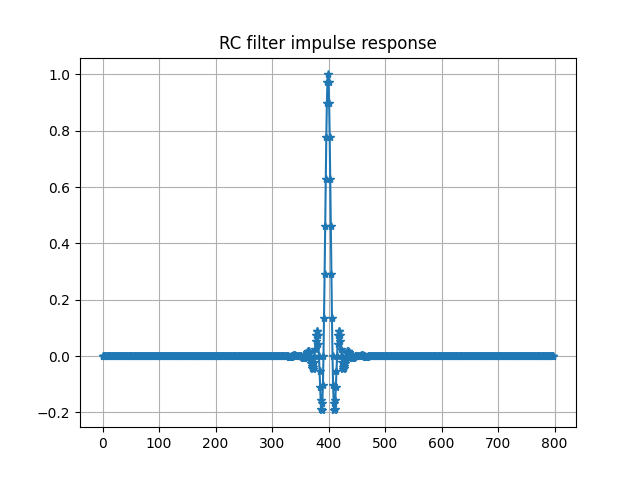

len(y) = 800, len(t) = 800, len(s) = 804


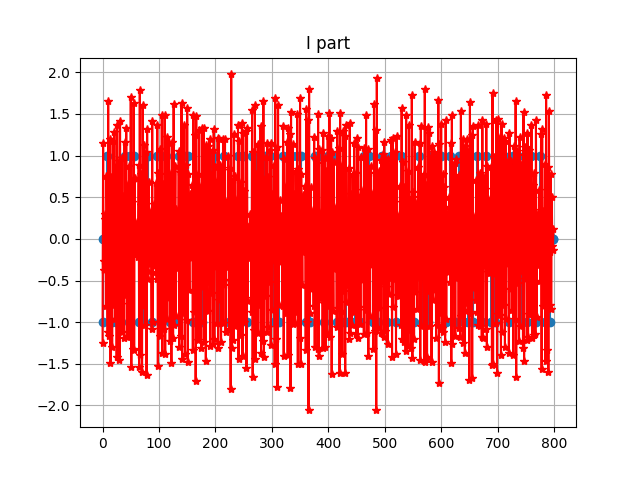

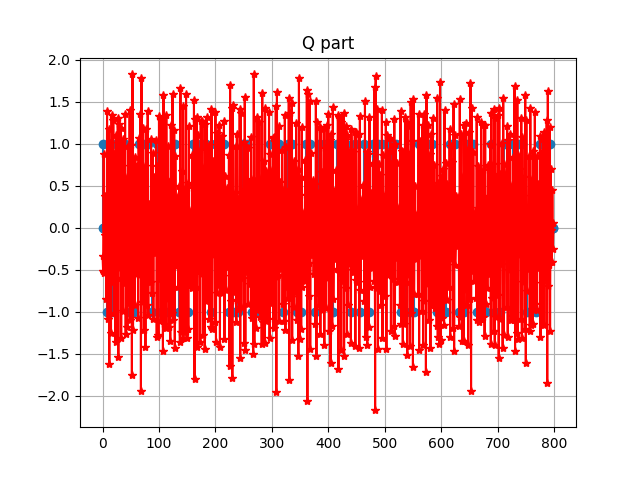

In [101]:
N = 100
Fs = 8 # f_sampling / f_symbol (SPS)
f0 = 3.2 # f_carrier / f_symbol
phase_0 = 3 / 9 # semicircles
delay = 0.1

s_rc = gen_rcfilter_impulse_response(N, Fs)
s_qpsk = gen_qpsk_symbols(N, Fs)
qpsk_filtered = np.convolve(s_qpsk, s_rc, 'same')
# ----- Add delay -----
p = 1
q = 1
x0 = delay # it is negative delay
global s_rc_re_delay 
#lobal qpsk_filtered
qpsk_filtered = resampling_lagrange_step_ver(qpsk_filtered, 1, 0.1)
#qpsk_filtered = resampling_lagrange(qpsk_filtered, p, q, x0) # qpsk_filt_del

# ----- Add Carrier and initial phase -----
qpsk_filtered = add_phase(qpsk_filtered, phase_0)
qpsk_filtered = add_freq(qpsk_filtered, f0 / Fs)

import ipympl
%matplotlib inline
%matplotlib widget
plt.figure()
plt.stem(s_qpsk.real)
plt.plot(qpsk_filtered.real, 'r*-')
plt.grid()
plt.title('I part')
plt.show()


plt.figure()
plt.stem(s_qpsk.imag)
plt.plot(qpsk_filtered.imag, 'r*-')
plt.grid()
plt.title('Q part')
plt.show()

#s_rc_conv = np.convolve(s_qpsk_with_carr, s_rc, 'same')


In [102]:
def plot_iq( delay: float, fsymb_to_fsampl: float, phase: float, f0: float):
    print(f"fract omega = {f0}, fsymb_to_fsampl = {fsymb_to_fsampl}, phase = {phase}")
    matplotlib.pyplot.close()

    signal_iq = qpsk_filtered
    
    mixed_sig = add_freq(signal_iq, f0)
    sig_default = add_phase(mixed_sig, phase)

    p = 1
    q = round(fsymb_to_fsampl) #todo -> remove round()
    x0 = delay
    print(f"p = {p}, q = {q}, x = {x0}")
    res_sig = resampling_lagrange_step_ver(sig_default, fsymb_to_fsampl, x0)
    #res_sig = resampling_lagrange(sig_default, p, q, x0)
    plt.close()
    plt.figure()
    plt.plot(res_sig.real, res_sig.imag, '.')
    plt.grid()
    plt.show()

In [103]:
delay_float = widgets.BoundedFloatText(
    value=0,
    min=-1,
    max=1,
    step=0.01,
    description='Delay before first symbol, samples:',
    disabled=False
)

sps = widgets.BoundedFloatText(
    value=1.0,
    min=1,
    max=10,
    step=0.0001,
    description='SPS',
    disabled=False
)

phase_float = widgets.BoundedFloatText(
    value=.0,
    min=-1,
    max=1,
    step=0.0001,
    description='Phase, [-1, 1], semicircles',
    disabled=False
)

f0_float = widgets.BoundedFloatText(
    value=.0,
    min = 0,
    max = 1,
    step = 0.0001,
    description = 'f0, [0, 1], circles',
    disabled = False
)
#print(qpsk_filtered)

# Use the interact function to connect the slider to the plot function
interact(plot_iq, delay=delay_float, fsymb_to_fsampl=sps, phase = phase_float, f0 = f0_float)

interactive(children=(BoundedFloatText(value=0.0, description='Delay before first symbol, samples:', max=1.0, …

<function __main__.plot_iq(delay: float, fsymb_to_fsampl: float, phase: float, f0: float)>